# Chapter 1: The Machine Learning Landscape


### Example 1.1: Training and Running a Linear Model Using Scikit-Learn



In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
plt.style.use('fivethirtyeight')

In [145]:
oecd = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/oecd_bli_2015.csv',thousands=',')

In [146]:
gdp = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv',thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [147]:
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [148]:
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [149]:
oecd = oecd[oecd["INEQUALITY"]=="TOT"]

In [150]:
oecd = oecd.pivot(index="Country", columns="Indicator", values="Value")

In [151]:
oecd.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [152]:
gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp.set_index("Country", inplace=True)

In [153]:
gdp.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [154]:
full_country_stats = pd.merge(left=oecd, right=gdp,left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))   
country_stats = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [155]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

Text(0, 0.5, 'GDP Per Capita')

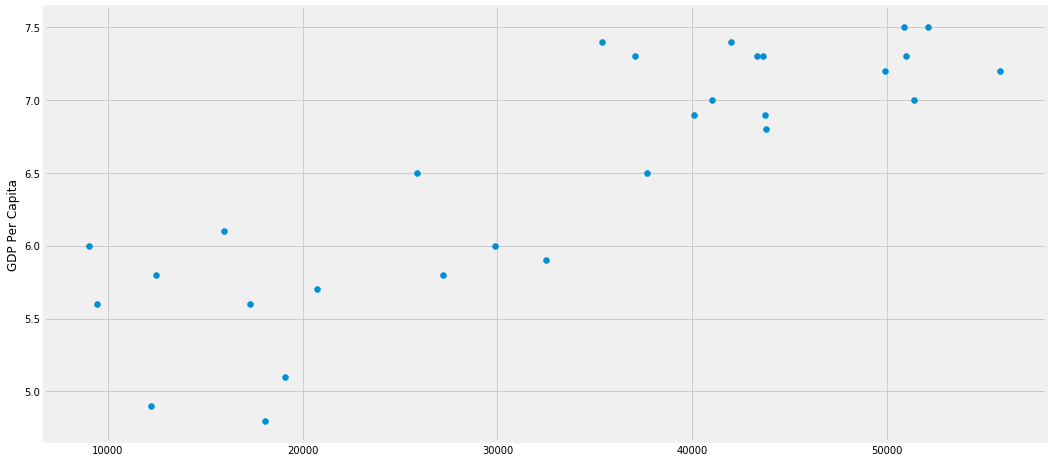

In [156]:
%matplotlib inline  

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.ylabel('Life Satisfaction Score')
plt.ylabel('GDP Per Capita')


In [157]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [158]:
model1.fit(X,y)

X_new = [[22587]]

print(model1.predict(X_new))

[[5.96242338]]


In [159]:
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor(n_neighbors=3)

In [160]:
model2.fit(X,y)

X_new = [[22587]]

print(model2.predict(X_new))

[[5.76666667]]


In [161]:
x_plot = np.c_[np.arange(10000,50000,10)]

In [162]:
y_plot1 = model1.predict(x_plot)
y_plot2 = model2.predict(x_plot)

Text(0.5, 1.0, 'Model 1')

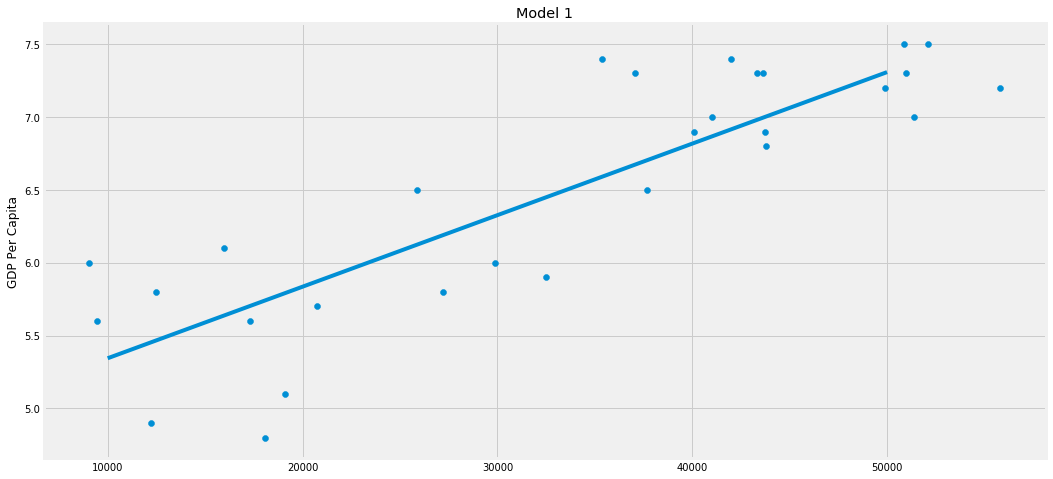

In [163]:
%matplotlib inline  

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.ylabel('Life Satisfaction Score')
plt.ylabel('GDP Per Capita')
plt.plot(x_plot,y_plot1)
plt.title('Model 1')

Text(0.5, 1.0, 'Model 2')

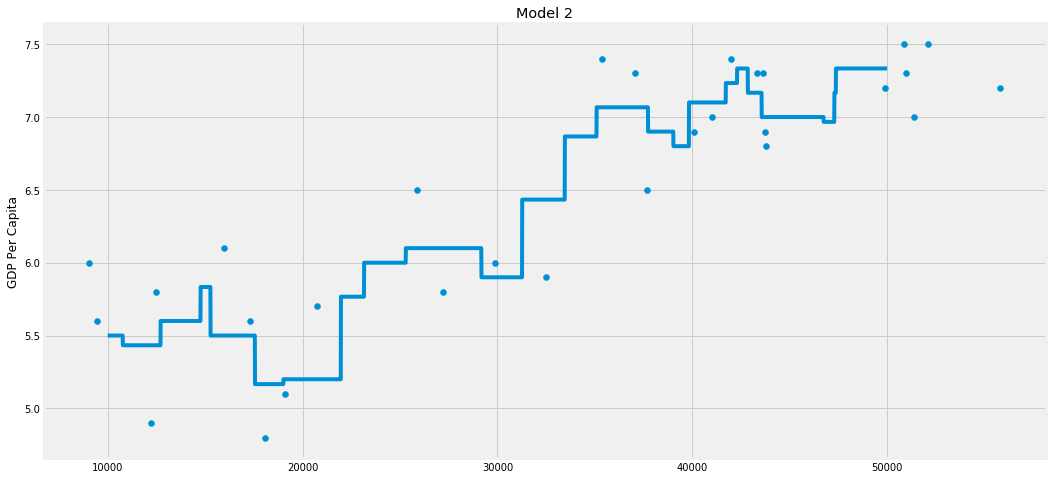

In [164]:
%matplotlib inline  

plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.ylabel('Life Satisfaction Score')
plt.ylabel('GDP Per Capita')
plt.plot(x_plot,y_plot2)
plt.title('Model 2')

# Questions

### 1. How do you define machine learning?

I define machine learning as an intelligence that is capable of learning and making assumptions about data. As the amount of data increases, more experienced the intelligence becomes.

### 2. Name four types of problems where it shines.

    - Regression;
    - Classification;
    - Clusterization;
    - Data exploration.
    
### 3. What is labeled training set?

A training set is a subdivision from the total data set. Labeled means that the data in the set has an output thtat is marked and classified by the observer. Labeled data are used in supervised classification.

### 4. Two most common supervised tasks.

    - Regression;
    - Classification.
    
### 5. Name four common unsupervised tasks.

    - Clusterization;
    - Dimensionality Reduction;
    - Visualization;
    - Anomaly Detection.
    
### 6. What type of algorithm would you use to allow a robot to walk in various unkown terrains?

I would use reinforcement learning, where the robot can learn about the terrains and optimize its own decision.

### 7. What type of algorithm would you use to segment your customers into multiple groups?

I would use unsupervised learning algorithm as K-Means.

### 8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

It can be both: supervised for messages that already has been classified or unsupervised for new messages.

### 9. What is an online learning system?

It's a system where the data streams into machine learning algorithm continously.

### 10. What is out-of-core learning system?

It's a type of system that helps handle data that are abundant and doesn't fit in your computer memory.


### 11. What type of learning algorithm relies on a similarity measure to make predictions?

Instance based algorithms.

### 12. What is the difference between a model parameter and a learning algorithm's hyperparameter?

Model parameter is a mathematical carachteristic from the algorithm that you're using. Model hyperparameter is a setting that you change to modify how your algorithm learn something.

### 13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

These models uses optimization techniques to find the best parameters that fit a set of data minimizing the error function. Then, the model makes predicitions of new data using these parameters.

### 14. Name four challenges in machine learning.

    - Unbalanced data;
    - Trade-Off: Bias and Variance;
    - Overfitting and Underfitting;
    - Data preparation;
    
### 15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

The model is simply memorizing information about data and not learning about it. This is what we call: overfitting. Possible solutions:

- Reduce model complexity;
- Regularization;
- Increase the ammount of data;
- Feature selection;
- Others...

### 16. What is a test set and why would you want to use it?

It's a set of data that helps us to analyze the performance of an algorithm before putting it in production. It contains new data that may not has ben passed trough the algorithm in training session.

### 17. What is the purpose of a validation set?

Validation set is used for compare performance of different models or the same model with different hyperparameters.


### 18. What can go wrong if you tune hyperparameters using the test set?

It may not perform well on the new data because the model is adjusted just for that specific set.

### 19. What is cross-validation and why would you prefer it to a validation set?

Cross-validation is a tool to compare the average performance of models. That technique helps to generalize your model passing to it different sets of data.
